In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear un conjunto de datos de prueba (sintético)
np.random.seed(42)
num_samples = 100
data = pd.DataFrame({
    'minutos_hablados': np.random.randint(100, 500, num_samples),
    'mensajes_texto': np.random.randint(50, 200, num_samples),
    'uso_datos_moviles': np.random.rand(num_samples) * 10,
    'churn': np.random.choice([0, 1], num_samples)
})
# Mostrar las primeras filas del dataset
print(data.head())  # Muestra las primeras 5 filas

# Mostrar información del dataset
print(data.info())

# Descripción estadística de los datos
print(data.describe())

   minutos_hablados  mensajes_texto  uso_datos_moviles  churn
0               202              64           0.808533      1
1               448              94           3.696545      1
2               370             114           2.421599      0
3               206             138           8.031398      1
4               171             120           4.703006      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   minutos_hablados   100 non-null    int64  
 1   mensajes_texto     100 non-null    int64  
 2   uso_datos_moviles  100 non-null    float64
 3   churn              100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None
       minutos_hablados  mensajes_texto  uso_datos_moviles       churn
count        100.000000      100.000000         100.000000  100.000000
mean         311.720000      126.490000 

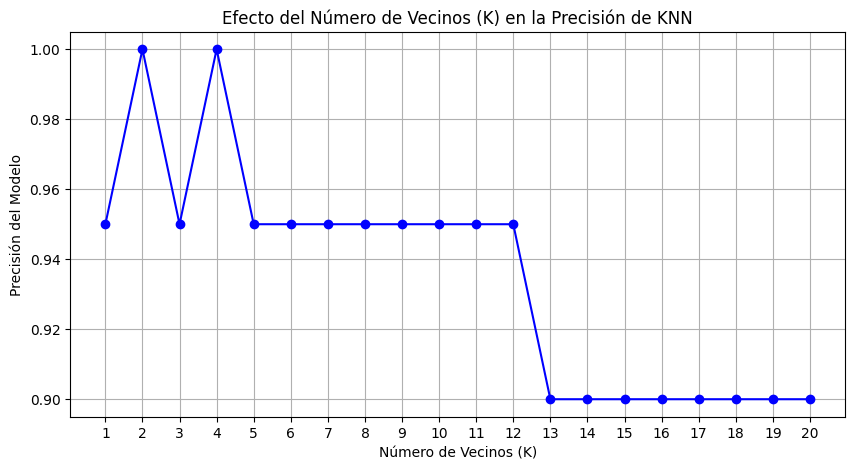

In [ ]:
# Generar 100 muestras de clientes ficticios
num_samples = 100
minutos_mensuales = np.random.randint(100, 600, num_samples)  # Minutos hablados entre 100 y 600
mensajes_texto = np.random.randint(10, 200, num_samples)  # SMS enviados entre 10 y 200
uso_datos = np.random.uniform(0.5, 10, num_samples)  # Uso de datos en GB entre 0.5 y 10
facturacion_mensual = minutos_mensuales * 0.1 + mensajes_texto * 0.05 + uso_datos * 5  # Factura estimada
# Generar variable objetivo (Churn: 1=se va, 0=se queda) con cierto patrón
churn = (facturacion_mensual > 50).astype(int)  # Si la factura es alta, mayor probabilidad de churn
# Crear DataFrame
data = pd.DataFrame({
    'Minutos Mensuales': minutos_mensuales,
    'Mensajes de Texto': mensajes_texto,
    'Uso de Datos (GB)': uso_datos,
    'Facturación Mensual': facturacion_mensual,
    'Churn': churn
})
# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['Churn'])
y = data['Churn']
# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar las características para mejorar la precisión del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Probar con diferentes valores de K para ver su impacto en la precisión
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))
# Graficar la precisión en función de K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Número de Vecinos (K)")
plt.ylabel("Precisión del Modelo")
plt.title("Efecto del Número de Vecinos (K) en la Precisión de KNN")

plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Elegir el mejor valor de K encontrado en la gráfica (ajústalo según los resultados)
best_k = k_values[np.argmax(accuracies)]
print(f"El mejor valor de K encontrado: {best_k}")
# Entrenar el modelo KNN con el mejor K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
# Hacer predicciones
y_pred = knn_best.predict(X_test)
# Evaluación del modelo final
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Precisión del modelo con K={best_k}: {accuracy:.2f}')
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", class_report)

El mejor valor de K encontrado: 2
Precisión del modelo con K=2: 1.00
Matriz de Confusión:
 [[ 3  0]
 [ 0 17]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        17

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



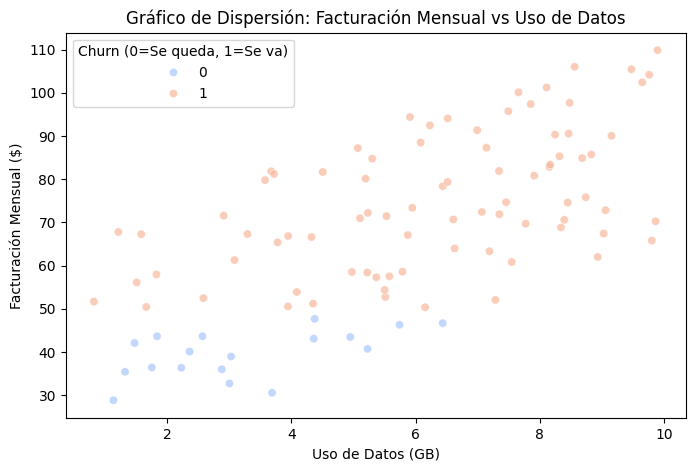

In [ ]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data['Uso de Datos (GB)'],
    y=data['Facturación Mensual'],
    hue=data['Churn'],
    palette='coolwarm',
    alpha=0.7
)

# Etiquetas y título
plt.xlabel("Uso de Datos (GB)")
plt.ylabel("Facturación Mensual ($)")
plt.title("Gráfico de Dispersión: Facturación Mensual vs Uso de Datos")
plt.legend(title="Churn (0=Se queda, 1=Se va)")

# Mostrar gráfico
plt.show()